In [40]:
import pandas as pd
import seaborn as sns

# Visualisation

In [41]:
data_raw = pd.read_csv('./train.csv')
sns.set_style('dark')

In [42]:
data_raw['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [43]:
data_raw.drop(index=data_raw[data_raw['Age'].isnull()].index, inplace=True)

In [44]:
len(data_raw)

714

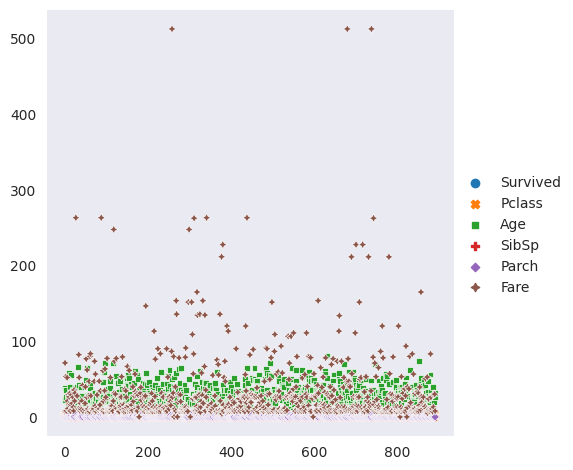

In [45]:
sns.relplot(data_raw.drop('PassengerId', axis=1))

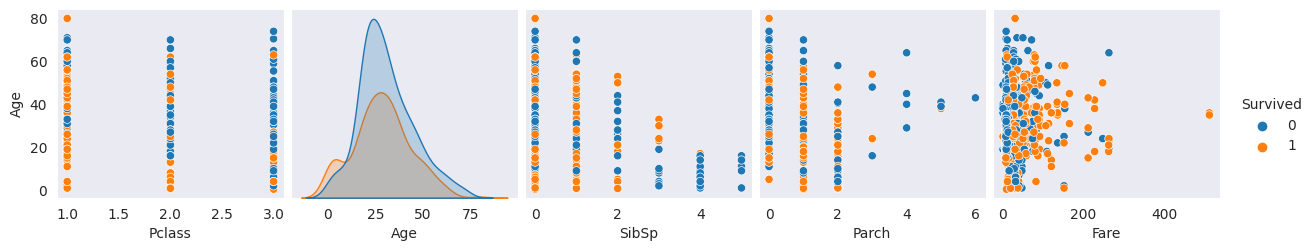

In [46]:
sns.pairplot(data_raw.drop('PassengerId', axis=1), hue='Survived', y_vars='Age')

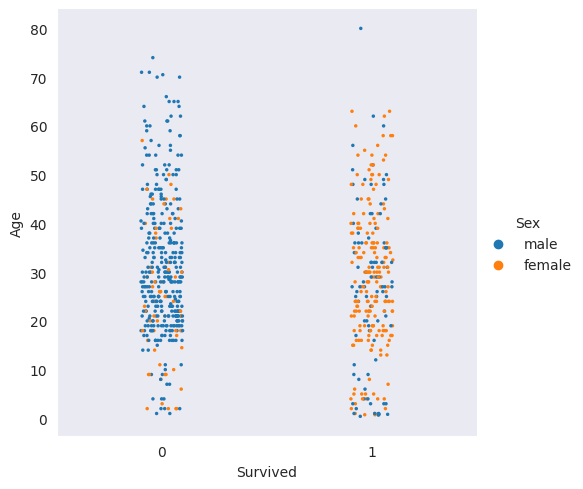

In [47]:
sns.catplot(data_raw, x='Survived', y='Age', hue='Sex', size=2.5)

# Data Cleanup and Optimisation

Already dropped the null indices

In [48]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

In [49]:
data_raw.loc[data_raw['Sex'] == 'male', 'Sex'] = 1
data_raw.loc[data_raw['Sex'] == 'female', 'Sex'] = 0
data_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [50]:
ros = RandomOverSampler(random_state=0)

In [51]:
data_X = data_raw[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
data_y = data_raw['Survived']

train_X, val_X, train_y, val_y = train_test_split(data_X, data_y, test_size=0.2)

In [52]:
train_X, train_y = ros.fit_resample(train_X, train_y)

In [53]:
from sklearn.preprocessing import StandardScaler #scaling dataset

sc = StandardScaler()
sc.fit_transform(train_X, train_y)
sc.fit_transform(val_X, val_y)

array([[-1.59758628,  0.82604657,  1.27424628,  0.4207597 , -0.55186533,
         1.23843231],
       [-1.59758628,  0.82604657,  2.65738416,  0.4207597 ,  0.55963808,
         0.84489721],
       [ 0.83278434, -1.2105855 ,  0.6156092 ,  0.4207597 ,  5.00565171,
        -0.01861412],
       [ 0.83278434, -1.2105855 ,  1.14251887,  0.4207597 , -0.55186533,
        -0.3832561 ],
       [ 0.83278434, -1.2105855 , -0.1747553 , -0.56561141,  0.55963808,
        -0.42727398],
       [ 0.83278434,  0.82604657, -1.36030205,  0.4207597 ,  0.55963808,
        -0.35282398],
       [ 0.83278434,  0.82604657, -0.50407384, -0.56561141, -0.55186533,
        -0.49520281],
       [-1.59758628, -1.2105855 , -0.50407384, -0.56561141, -0.55186533,
         2.59583082],
       [ 0.83278434,  0.82604657, -0.24061901, -0.56561141, -0.55186533,
        -0.29005774],
       [ 0.83278434,  0.82604657, -1.92541267, -0.56561141,  0.55963808,
        -0.51331645],
       [ 0.83278434,  0.82604657,  1.70236039, -0.

## For now importing and using knn with default parameters i.e without grid search 

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import numpy as np

In [55]:
knn_model = KNeighborsClassifier()
print(knn_model.get_params()) # default values

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [56]:
knn_model.fit(train_X, train_y)
pred = knn_model.predict(val_X)

print(classification_report(val_y, pred))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74        88
           1       0.58      0.58      0.58        55

    accuracy                           0.68       143
   macro avg       0.66      0.66      0.66       143
weighted avg       0.68      0.68      0.68       143



# Not too good, adding grid search

In [61]:
from sklearn.model_selection import GridSearchCV

params = {
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 30, 50, 75, 100, 150, 200, 250],
    'p': [1, 2, 3, 4, 5],
    'n_jobs': [-1, 1, 6],
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

gs = GridSearchCV(knn_model, params, scoring='precision', n_jobs=-1)
knn_gs = gs.fit(train_X, train_y)
gs.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 10,
 'n_jobs': -1,
 'n_neighbors': 2,
 'p': 1}

In [64]:
pred = knn_gs.predict(val_X)
print(classification_report(val_y, pred))

              precision    recall  f1-score   support

           0       0.69      0.85      0.76        88
           1       0.62      0.38      0.47        55

    accuracy                           0.67       143
   macro avg       0.65      0.62      0.62       143
weighted avg       0.66      0.67      0.65       143



In [65]:
test = pd.read_csv('./test.csv')
pas = test["PassengerId"]

test.loc[test["Sex"] == 'male', "Sex"] = 1
test.loc[test["Sex"] == 'female', "Sex"] = 0

test.loc[test["Age"].isnull(), "Age"] = 30.27259
test.loc[test["Fare"].isnull(), "Fare"] = 35.627188

test_X = test[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]]

pred = knn_gs.predict(test_X)

print(pred)

pd.concat([pas, pd.DataFrame(pred, columns=["Survived"])], ignore_index=True, axis=1).to_csv('final.csv', index=False)

[0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0
 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0
 0 1 0 1 1 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0
 1 0 1 0 1 0 0 1 0 0 0]


# barely any improvement bruv